In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("sell_data.csv")
                # index_col = 'Year',
                # parse_dates=False)
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,ItemID,Quantity
0,2014-11-11,515025,14
1,2014-11-11,512210,73
2,2014-11-11,512340,44
3,2014-11-11,HA590140,1
4,2014-11-11,541004,125
...,...,...,...
164656,2024-06-17,515175,2
164657,2024-06-17,512332,2
164658,2024-06-17,512665,2
164659,2024-06-17,515159,1


In [2]:
itemID = ['515096'] #input the item id you want to search
mask = df['ItemID'].isin(itemID)
filtered_item = df[mask]
filtered_item

,Date,ItemID,Quantity
58,2014-11-12,515096,120
59,2014-11-12,515096,120
84,2014-11-19,515096,120
85,2014-11-19,515096,120
86,2014-11-19,515096,120
...,...,...,...
164630,2024-06-17,515096,150
164641,2024-06-17,515096,2
164643,2024-06-17,515096,1
164645,2024-06-17,515096,1


In [3]:
result = filtered_item.groupby(filtered_item.Date.dt.year)['Quantity'].sum()
result = pd.DataFrame({'Year':result.index, 'Qty':result.values})

### in crease the value to get on the same graph with market qty
result = result.reset_index()  # make sure indexes pair with number of rows


for i in range(len(result)):
    result.loc[i, 'Qty'] = result.loc[i, 'Qty'] * 100
result

,index,Year,Qty
0,0,2014,120000
1,1,2015,353800
2,2,2016,585000
3,3,2017,1571300
4,4,2018,2317500
5,5,2019,1657500
6,6,2020,1657100
7,7,2021,4692000
8,8,2022,3377000
9,9,2023,2209500


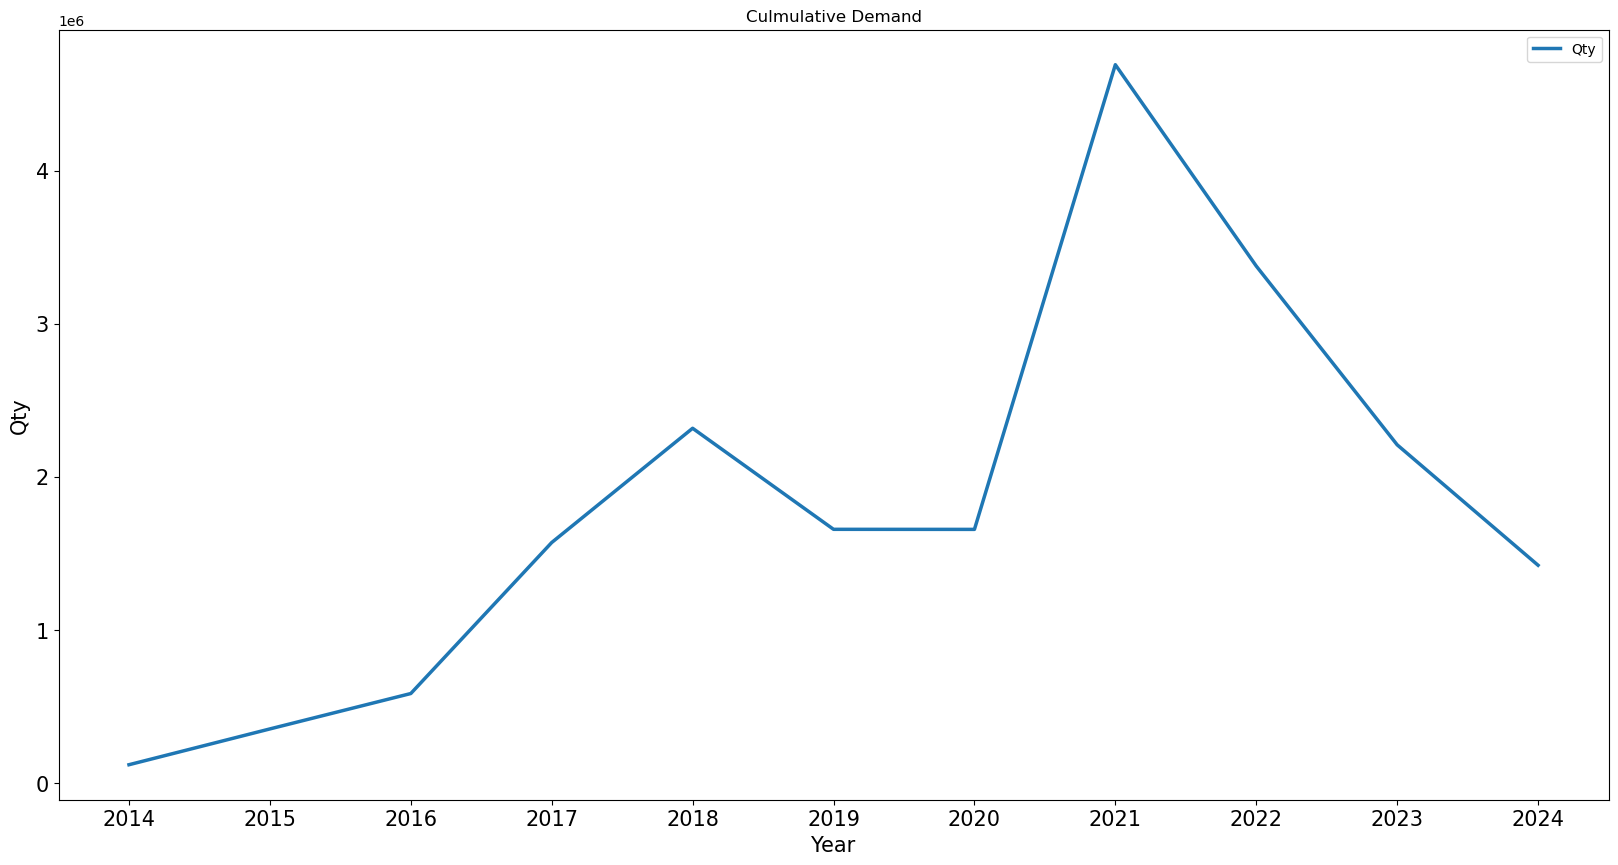

,index,Year,Qty
0,0,2014,120000
1,1,2015,353800
2,2,2016,585000
3,3,2017,1571300
4,4,2018,2317500
5,5,2019,1657500
6,6,2020,1657100
7,7,2021,4692000
8,8,2022,3377000
9,9,2023,2209500


In [4]:
# plot the data
#result.plot(x="Year", y="Qty", kind="line") 
result['Qty'].plot(legend = True, label = 'Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result.index,result["Year"].values)
# plotting a line plot after changing it's width and height

plt.show()
result

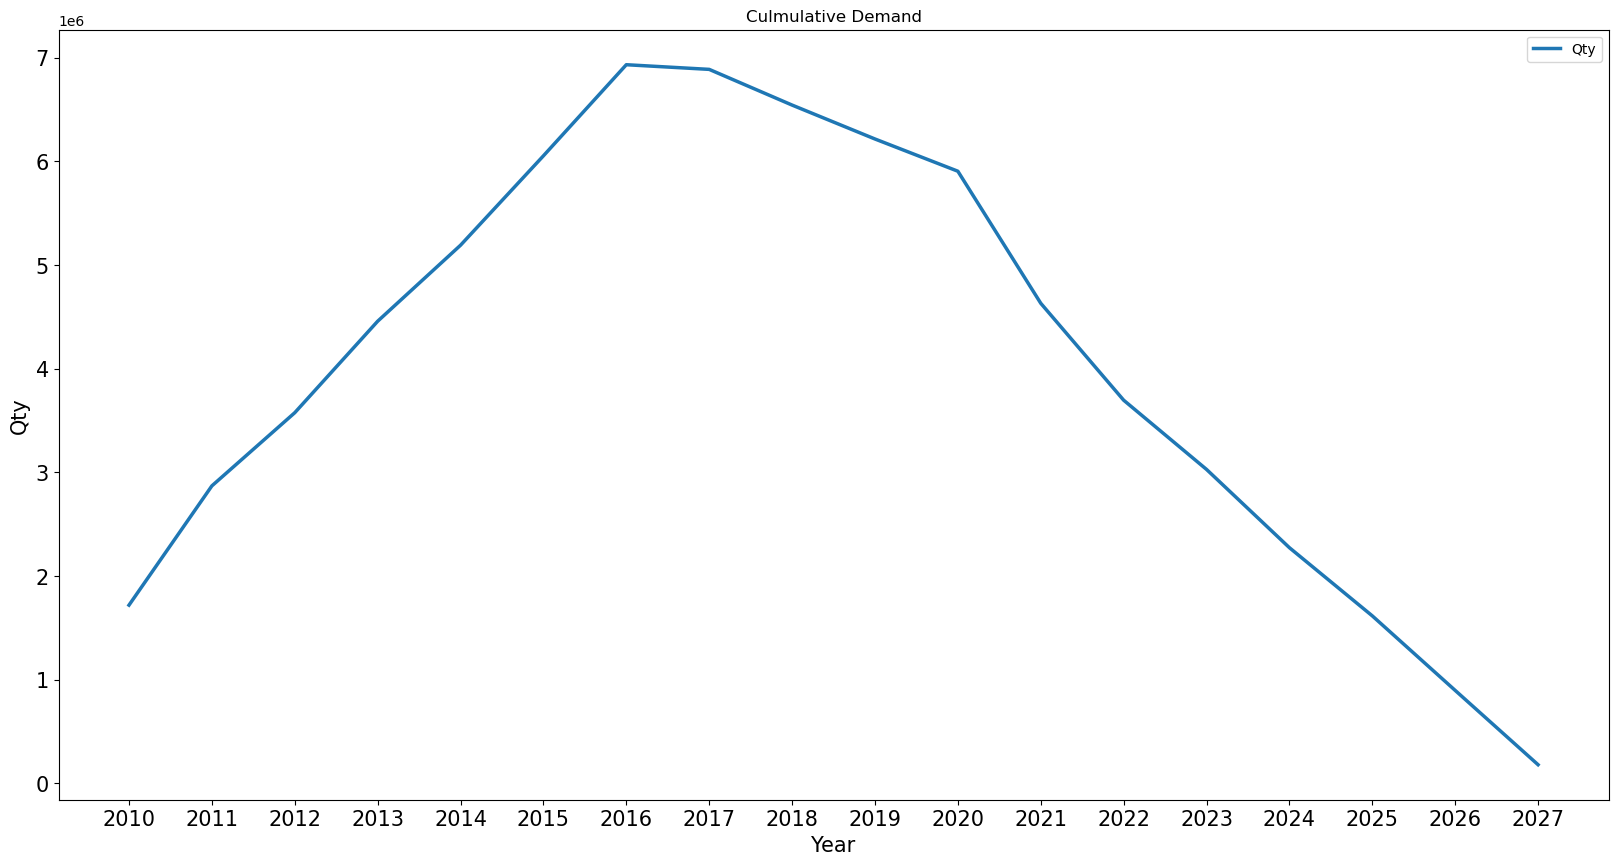

In [29]:
df = pd.read_csv("data.csv")
                # index_col = 'Year',
                # parse_dates=False)
itemID = ['515096'] #input the item id you want to search
mask = df['ItemID'].isin(itemID)
filtered_item = df[mask]
yearly_total = {}
for index, row in filtered_item.iterrows(): # nice method to use
    year = row['Year']
    quantity = row['Quantity']
    if year not in yearly_total:
        yearly_total[year] = quantity
    else:
        yearly_total[year] += quantity
years = list(yearly_total.keys())
# creating the prediction of all total demand in the after-market (2010 -> 2027)
scrappage_rate = 0.05
after_market = {}
for current_year in range(years[0]+3,years[len(years)-1]+14,1):
    # check year that are in the after-market
    start_year = current_year -13
    end_year = current_year -3
    if(start_year < years[0]):
        start_year = years[0]
    year_included = years[start_year -years[0]:end_year-years[0]+1]
    #print(current_year,": ", year_included)
    #### calculate total up to current year###
    total = 0
    for year in year_included:
        total += yearly_total[year] *0.95**(current_year-(year+3)+1) ## 0.95 should be multiply extra n times for extra n years after 2010, 2010 is 1 time
        #print(year, ": " + str(current_year-(year+3)+1) + "times")
    after_market[current_year] = int(total)
    #print("**")
    #print(current_year, total)
# turn the dictionary into a df
result2 = pd.DataFrame(after_market.items(), columns=['Year', 'Qty'])

# plot the data
#result.plot(x="Year", y="Qty", kind="line") 
result2['Qty'].plot(legend = True, label = 'Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result2.index,result2["Year"].values)
# plotting a line plot after changing it's width and height

plt.show()

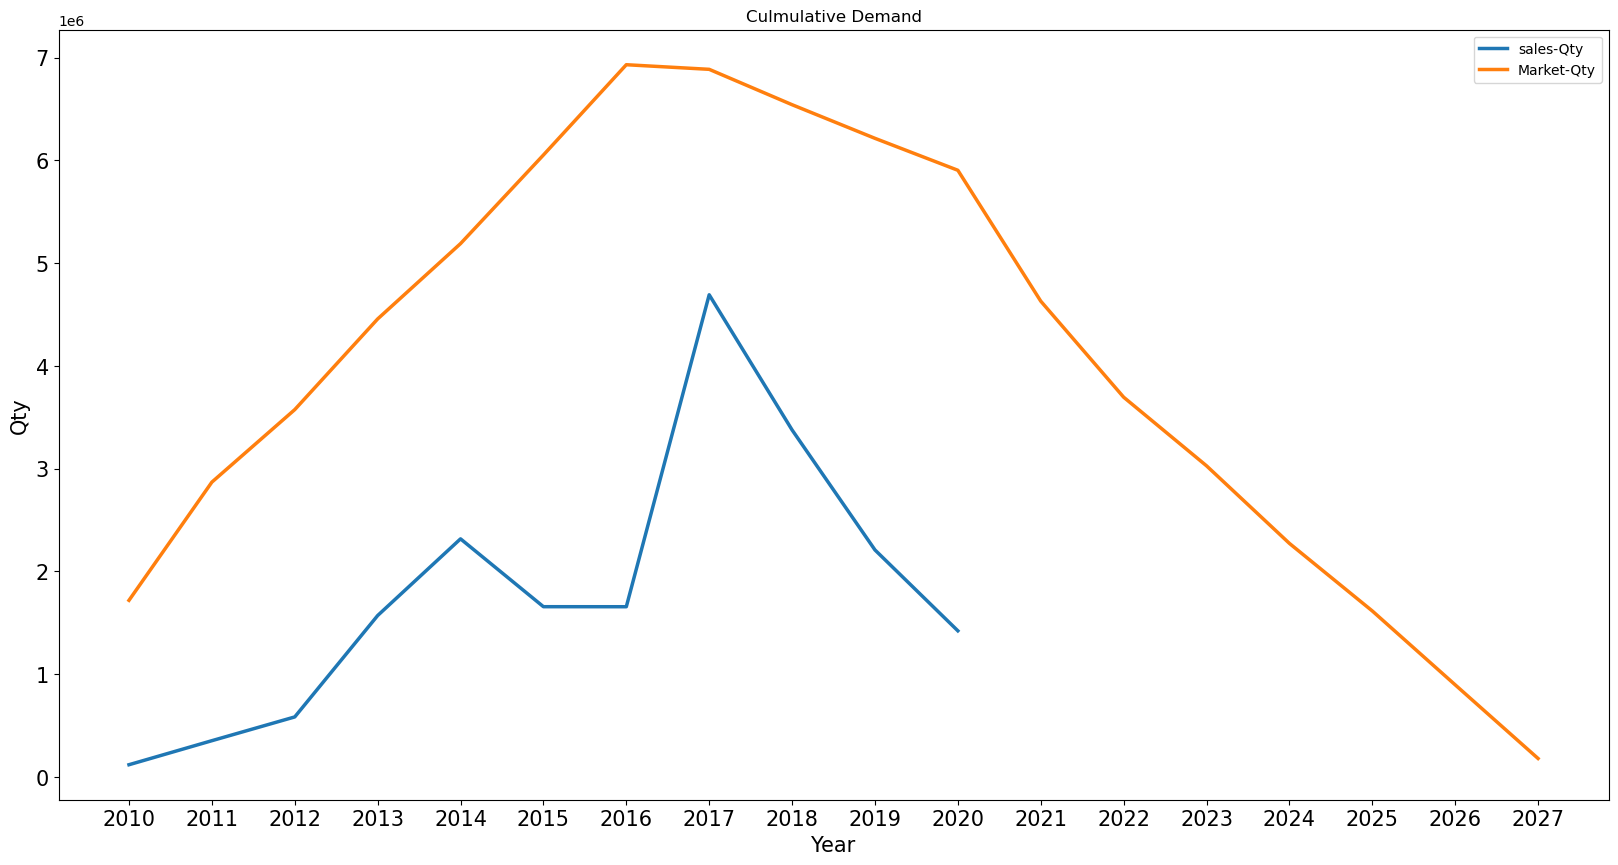

In [30]:


result['Qty'].plot(legend = True, label = 'sales-Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result.index,result["Year"].values)


result2['Qty'].plot(legend = True, label = 'Market-Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(result2.index,result2["Year"].values)



plt.show()